In [1]:
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from collections import OrderedDict
import zipfile
%matplotlib inline
import os
import numpy as np
import nibabel as nib
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
!curl -O vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xf images.tar
!mv Images StanfordDogs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  756M  100  756M    0     0  55.8M      0  0:00:13  0:00:13 --:--:-- 59.3M


In [16]:
# Define constants
IMG_SIZE = 224
BATCH_SIZE = 64
dataset_name = "stanford_dogs"
NUM_CLASSES = len(glob.glob('/content/{}/images/*'.format(dataset_name)))
data_path = '/content/{}'.format(dataset_name)
tar_file = '/content/images.tar'


In [20]:
import tarfile

In [21]:
# Extract dataset from tar file
with tarfile.open(tar_file, 'r') as tar:
    tar.extractall(path=data_path)


In [22]:
# Image augmentation transforms
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

In [24]:
# Load dataset
full_dataset = ImageFolder(root=os.path.join(data_path), transform=train_transforms)


In [25]:

# Split dataset into train and test
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [26]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


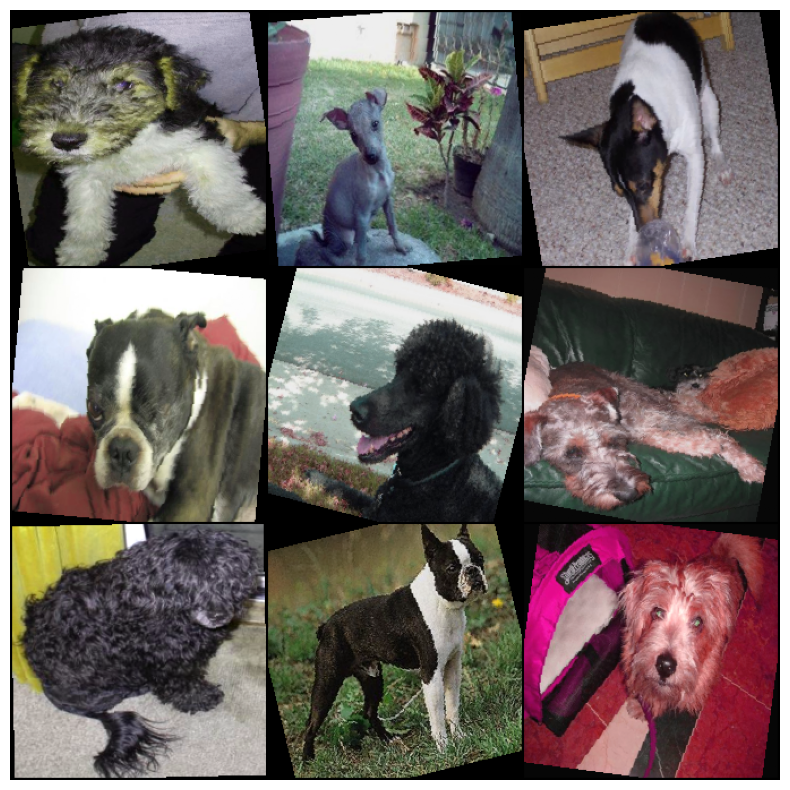

Images Images Images Images Images Images Images Images Images


In [28]:
# Display sample images
def show_images(dataloader, classes):
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    img_grid = make_grid(images[:9], nrow=3, padding=2, normalize=True)
    np_img_grid = img_grid.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(np_img_grid, (1, 2, 0)))
    plt.axis('off')
    plt.show()
    print(' '.join('%5s' % classes[labels[j]] for j in range(9)))

show_images(train_loader, full_dataset.classes)


In [34]:
class EfficientNetB0(torch.nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetB0, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc1 = torch.nn.Linear(256 * 7 * 7, 128)
        self.fc2 = torch.nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(-1, 256 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
from torch.nn import ModuleList, CrossEntropyLoss
from torch.optim import Adam
# Initialize the model, optimizer, and loss function
model = EfficientNetB0(num_classes=NUM_CLASSES)
optimizer = Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:412: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Train the model
for epoch in range(40):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d, Loss: %. How do I create a simple web application that allows users to upload images and then uses TensorFlow.js to classify them?


RuntimeError: shape '[-1, 12544]' is invalid for input of size 2768896

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)